<a href="https://colab.research.google.com/github/leoafs/DIP/blob/main/imageTransformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
image = cv2.imread('/content/drive/MyDrive/images/lena.png')

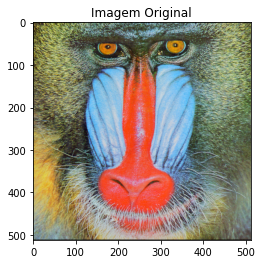

In [31]:
imfile = "/content/drive/MyDrive/images/baboon.png"
img = cv2.imread(imfile)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(1)
plt.title("Imagem Original")
plt.imshow(img)
height, width, c = img.shape

**Crop and flip an image using Numpy array indexing.**

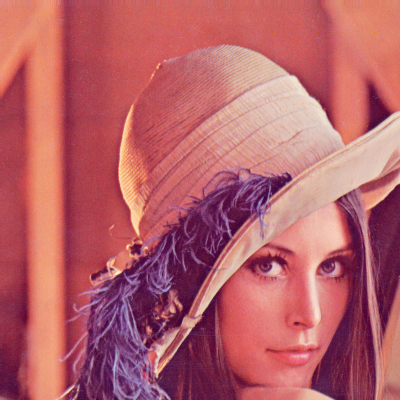

In [39]:
cropped_img=image[0:400,:400,:400]
cv2_imshow(cropped_img)


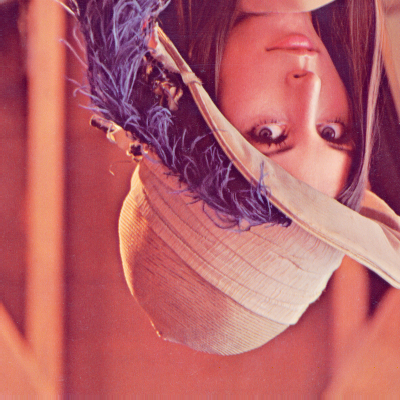

In [40]:
flipped_img = cropped_img[::-1,:,:]
cv2_imshow(flipped_img)


**Implement image translation using Numpy and OpenCV**.

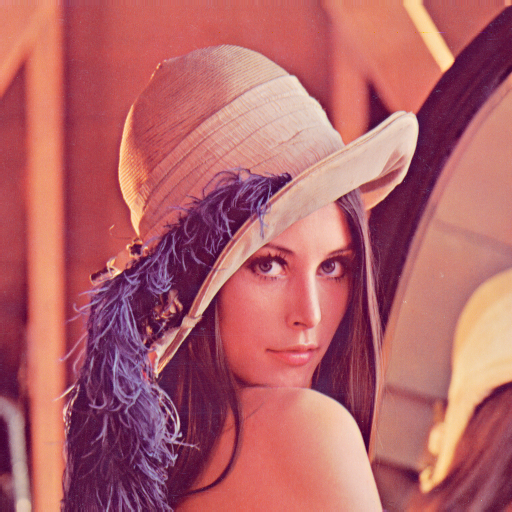

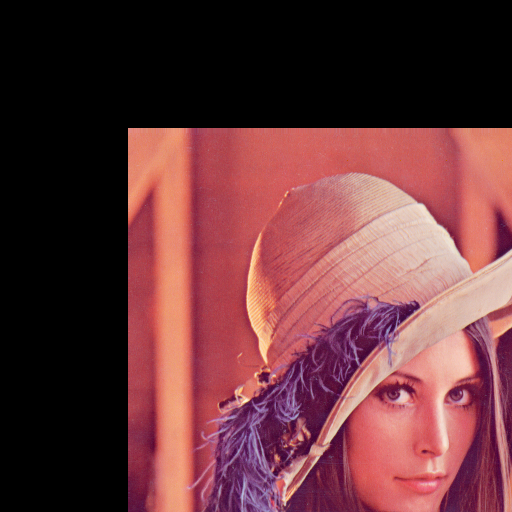

In [41]:


# Store height and width of the image
height, width = image.shape[:2]

quarter_height, quarter_width = height / 4, width / 4

T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])

# We use warpAffine to transform
# the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))

cv2_imshow(image)
cv2_imshow(img_translation)
cv2.waitKey()

cv2.destroyAllWindows()


**Implement image rotation using Numpy and OpenCV.**






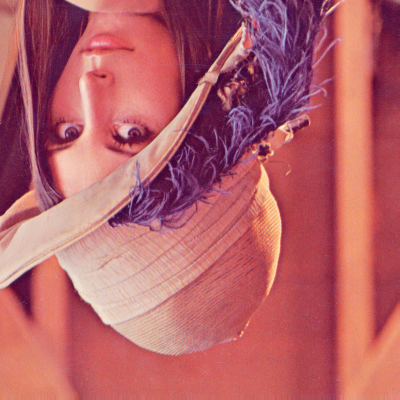

In [42]:
np_rotate=np.rot90(cropped_img,90)
cv2_imshow(np_rotate)




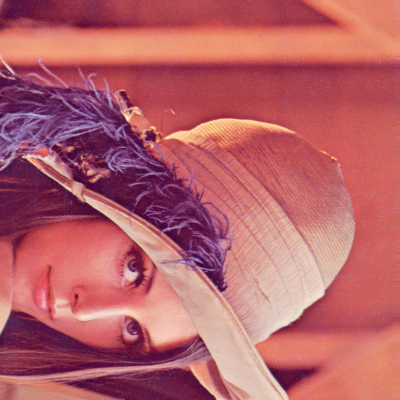

In [43]:
cv2_rotate=cv2.rotate(cropped_img,cv2.ROTATE_90_CLOCKWISE)
cv2_imshow(cv2_rotate)

**Implement image resizing using OpenCV**

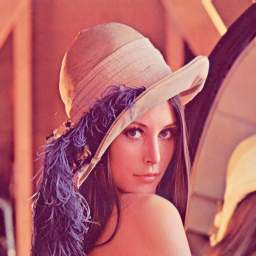

In [44]:
width = int(image.shape[1] * 50 / 100)
height = int(image.shape[0] * 50 / 100)
dsize=(width,height)
image_resize=cv2.resize(image,dsize)
cv2_imshow(image_resize)

**Implement bitwise operations: AND, OR, XOR.**


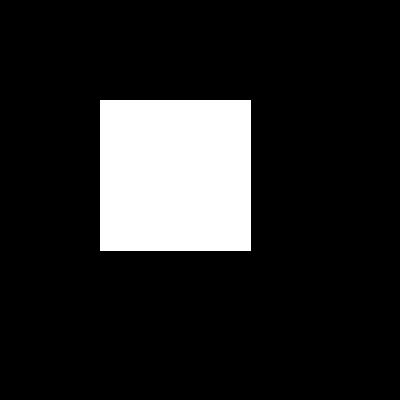

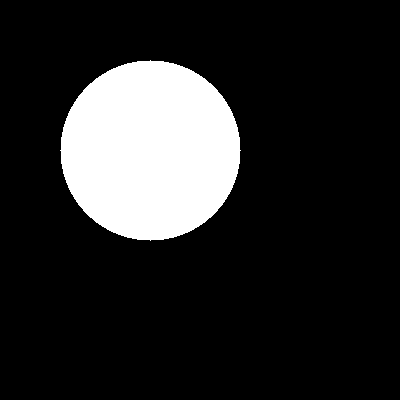

In [9]:
image1 = np.zeros((400, 400), dtype="uint8")

cv2.rectangle(image1, (100, 100), (250, 250), 255, -1)

cv2_imshow(image1)

image2 = np.zeros((400, 400), dtype="uint8")

cv2.circle(image2, (150, 150), 90, 255, -1)

cv2_imshow(image2)


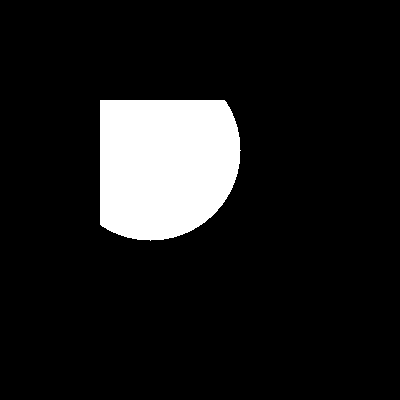

In [ ]:
bit_and = cv2.bitwise_and(image1,image2)

cv2_imshow(bit_and)

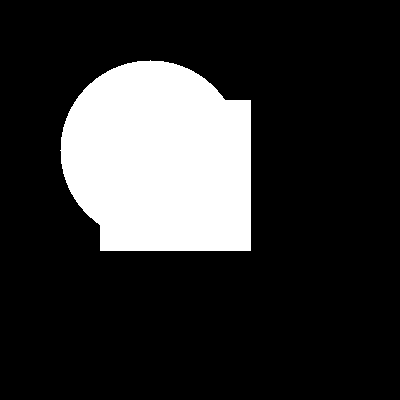

In [ ]:
bit_or = cv2.bitwise_or(image1,image2)

cv2_imshow(bit_or)

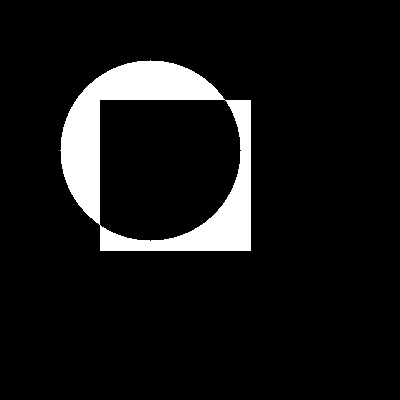

In [ ]:
bit_xor = cv2.bitwise_xor(image1,image2)

cv2_imshow(bit_xor)

 **Implement the "mask" operation, where a third image 'h' contains only a Region of Interest (ROI -- defined by the second image mask 'g') obtained from the input image 'f'. Note that this Region can be of any shape.**

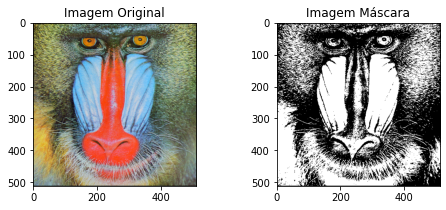

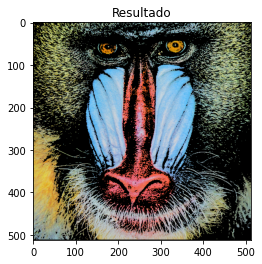

In [32]:
img1 = cv2.imread("/content/drive/MyDrive/images/baboon.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img_mask = cv2.imread("/content/drive/MyDrive/images/baboon.png", cv2.IMREAD_GRAYSCALE)
# Convertendo para escala binária
thresh = 127
img_mask = cv2.threshold(img_mask, thresh, 255, cv2.THRESH_BINARY)[1]

def mask(img,img_mask) :    
    masked_image = np.zeros((height, width, c), int)
    for i in range(height) :
        for j in range(width) :
            if(img_mask[i][j]==255) :
                masked_image[i][j] = img1[i][j]
    return masked_image

masked_image = mask(img1,img_mask)

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.title("Imagem Original")
plt.imshow(img1)
plt.subplot(122)
plt.title("Imagem Máscara")
plt.imshow(img_mask, cmap='gray')

plt.figure(2)
plt.title("Resultado")
plt.imshow(masked_image)

plt.show()
